# Load the file

- Due to compliance considerations, the DataFrame containing the loaded data is not shown.

In [3]:
import pandas as pd

file_path = '/Users/soichirotanabe/Desktop/TM470/data/IBT_April_2024_Final.csv'

# Read the file without parsing dates
april = pd.read_csv(file_path, low_memory=False)
print(april.columns)


Index(['DATE', 'AUDIENCE', 'TIME', 'Panel', 'DATA_TYPE'], dtype='object')


For testing purposes, data covering a two-week period was extracted.

In [6]:
df_2weeks = april[(april['DATE'] >= '2024-04-01') & (april['DATE'] <= '2024-04-14')].copy()

In [7]:
df = df_2weeks

# Clean the data for LSTM testing

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])  # ensure DATE is datetime
df['WEEKDAY'] = df['DATE'].dt.weekday  # Monday = 0, Sunday = 6

In [9]:
print(df['WEEKDAY'].unique())

[0 1 2 3 4 5 6]


In [10]:
df = df.drop(columns=['Panel', 'DATA_TYPE'])
df_copy = df.copy()

In [ ]:



def convert_time_columns(df):
    # Step 1: Extract hour and minute from TIME
    df['HOUR'] = df['TIME'] // 100
    df['MINUTE'] = df['TIME'] % 100

    # Step 2: Adjust DATE for hours >= 24 (i.e., past midnight into next day)
    df['DATE'] = pd.to_datetime(df['DATE'])  # ensure datetime
    df['ADJUSTED_DATE'] = df.apply(
        lambda row: row['DATE'] + pd.Timedelta(days=1) if row['HOUR'] >= 24 else row['DATE'],
        axis=1
    )

    # Step 3: Build full datetime
    df['DATE'] = pd.to_datetime(df['ADJUSTED_DATE'].dt.date.astype(str)) + pd.to_timedelta(df['HOUR'] % 24, unit='h') + pd.to_timedelta(df['MINUTE'], unit='m')

    # Step 4: Drop temp columns
    df.drop(columns=['HOUR', 'MINUTE', 'ADJUSTED_DATE'], inplace=True)
    
    return df

# Example usage:
df = convert_time_columns(df)

In [12]:
df

,DATE,AUDIENCE,TIME,WEEKDAY
0,2024-04-01 06:00:00,236,600,0
1,2024-04-01 06:01:00,244.3,601,0
2,2024-04-01 06:02:00,230,602,0
3,2024-04-01 06:03:00,242,603,0
4,2024-04-01 06:04:00,249.4,604,0
...,...,...,...,...
20155,2024-04-15 05:55:00,374.1,2955,6
20156,2024-04-15 05:56:00,378.5,2956,6
20157,2024-04-15 05:57:00,384.8,2957,6
20158,2024-04-15 05:58:00,376.2,2958,6


# pre-pilot study for LSTM

2025-07-03 15:31:55.612272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.



🔄 Running Experiment 1: 2 layer(s), 20 units, 60-min window


2025-07-03 15:31:57.159750: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-03 15:31:57.159988: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-07-03 15:31:57.159997: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-07-03 15:31:57.160050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-03 15:31:57.160076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-07-03 15:31:57.370684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignor

Epoch 1/50


2025-07-03 15:31:57.462257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:31:57.462974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:31:57.463526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

126/126 [==============================] - ETA: 0s - loss: 0.0082

2025-07-03 15:32:01.506109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:32:01.506837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:32:01.507291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

126/126 [==============================] - 5s 22ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 2/50
126/126 [==============================] - 2s 17ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 3/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0015 - val_loss: 9.6164e-04
Epoch 5/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0013 - val_loss: 8.3214e-04
Epoch 6/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0013 - val_loss: 7.2747e-04
Epoch 7/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0011 - val_loss: 6.8811e-04
Epoch 8/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0011 - val_loss: 5.9980e-04
Epoch 9/50
126/126 [==============================] - 2s 18ms/step - loss: 9.9968e-04 - val_loss: 6.1262e-04
Epoch 10/50
126/126 [==============================] - 2s 18ms/step - loss

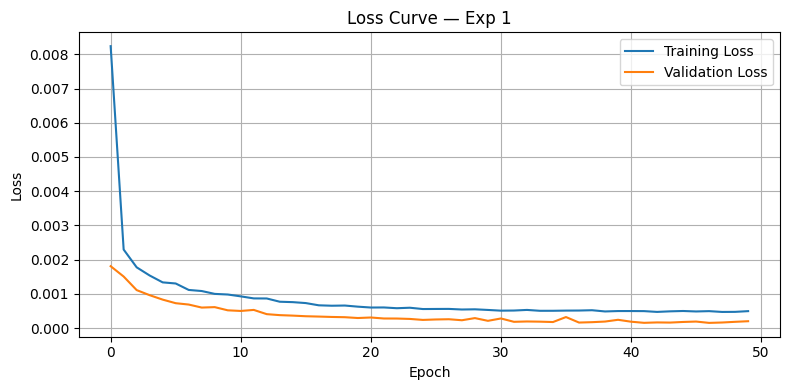

2025-07-03 15:33:52.427157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:33:52.427988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:33:52.428498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 10/629 [..............................] - ETA: 3s  

2025-07-03 15:33:52.637433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


629/629 [==============================] - 4s 6ms/step


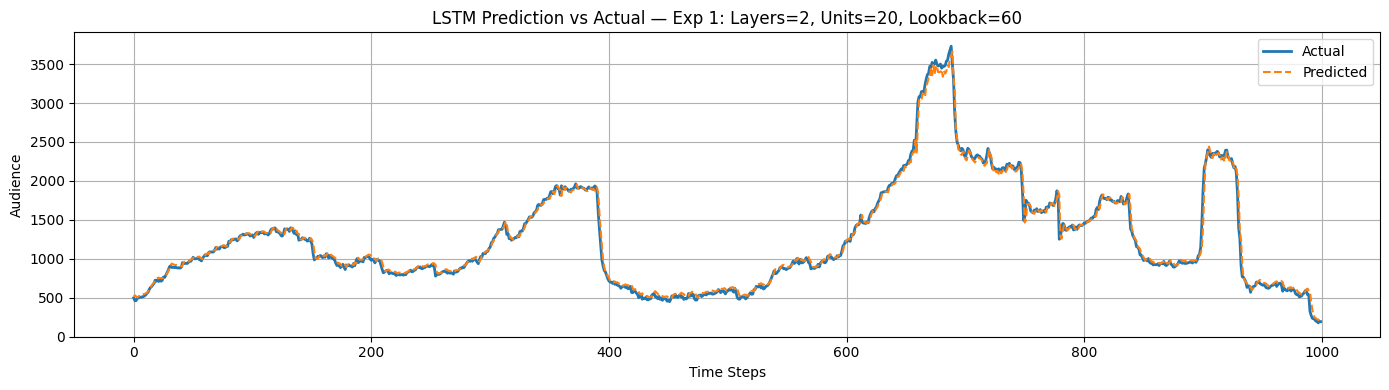


🔄 Running Experiment 2: 2 layer(s), 50 units, 60-min window
Epoch 1/50


2025-07-03 15:33:56.582383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:33:56.583246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:33:56.583749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

  4/126 [..............................] - ETA: 2s - loss: 0.0533  

2025-07-03 15:33:58.114824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - ETA: 0s - loss: 0.0051

2025-07-03 15:34:00.467100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:34:00.467712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:34:00.468818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

126/126 [==============================] - 4s 23ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 2/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 3/50
126/126 [==============================] - 2s 18ms/step - loss: 0.0012 - val_loss: 9.4080e-04
Epoch 4/50
126/126 [==============================] - 2s 18ms/step - loss: 9.7469e-04 - val_loss: 7.3646e-04
Epoch 5/50
126/126 [==============================] - 2s 19ms/step - loss: 8.9820e-04 - val_loss: 6.2475e-04
Epoch 6/50
126/126 [==============================] - 2s 18ms/step - loss: 7.9872e-04 - val_loss: 6.1692e-04
Epoch 7/50
126/126 [==============================] - 2s 19ms/step - loss: 7.9865e-04 - val_loss: 5.5322e-04
Epoch 8/50
126/126 [==============================] - 2s 18ms/step - loss: 7.1709e-04 - val_loss: 5.0055e-04
Epoch 9/50
126/126 [==============================] - 2s 18ms/step - loss: 6.5417e-04 - val_loss: 4.8687e-04
Epoch 10/50
126/126 [=============================

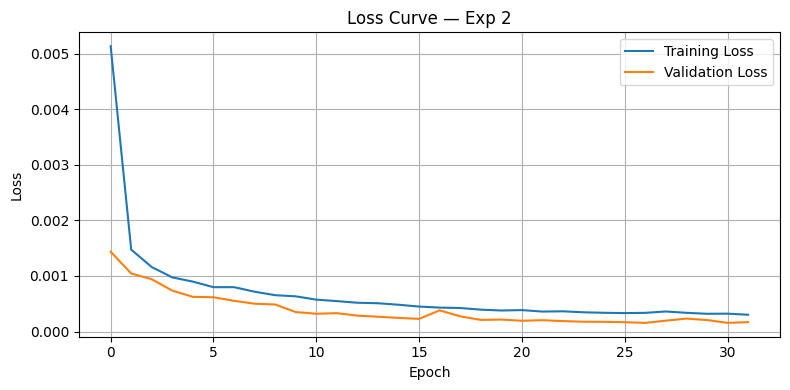

2025-07-03 15:35:13.432212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-07-03 15:35:13.433163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-07-03 15:35:13.433666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 19/629 [..............................] - ETA: 3s

2025-07-03 15:35:13.639989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


629/629 [==============================] - 4s 6ms/step


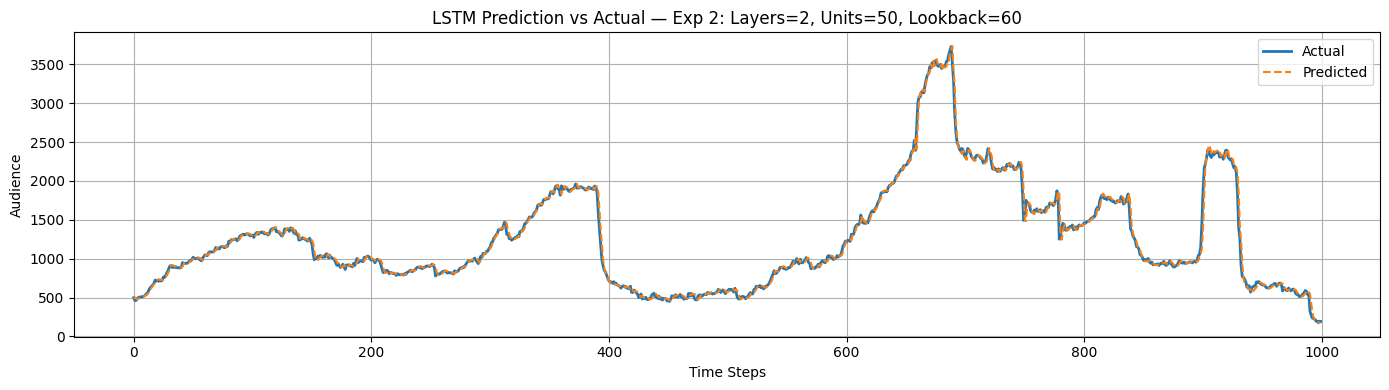


📊 Final Results:


,Experiment,Layers,Units,Lookback,MAE,RMSE,MAPE,Train Time (s)
0,2,2,50,60,26.722744,55.726260,0.038880,81.17
1,1,2,20,60,40.915332,63.282919,0.124668,119.21


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

# ----- STEP 1: Filter April data -----
df_april = df[(df['DATE'] >= '2024-04-01') & (df['DATE'] < '2024-05-01')].copy()

# ----- STEP 2: Clean AUDIENCE column -----
df_april['AUDIENCE'] = df_april['AUDIENCE'].astype(str).str.replace(',', '', regex=False)
df_april['AUDIENCE'] = df_april['AUDIENCE'].astype(float)

# ----- STEP 3: Scale AUDIENCE -----
scaler = MinMaxScaler()
df_april['AUDIENCE_SCALED'] = scaler.fit_transform(df_april[['AUDIENCE']])

# ----- STEP 4: Sequence generator -----
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

# ----- STEP 5: Define experiments -----
experiments = [
    #(1, 20, 60),
    #(1, 50, 60),
    (2, 20, 60),
    (2, 50, 60)
]

results = []

# ----- STEP 6: Run LSTM experiments -----
for i, (layers, units, lookback) in enumerate(experiments):
    print(f"\n🔄 Running Experiment {i+1}: {layers} layer(s), {units} units, {lookback}-min window")
    start_time = time.time()

    # Prepare sequences
    series = df_april['AUDIENCE_SCALED'].values
    X, y = create_sequences(series, lookback)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Build model
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=(layers == 2), input_shape=(X.shape[1], 1)))
    if layers == 2:
        model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model and store history
    history = model.fit(
        X, y,
        epochs=50,
        batch_size=128,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )

    # 🔍 Plot training & validation loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve — Exp {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X).flatten()
    y_true = y.flatten()

    # Rescale for visualisation and valid MAPE
    y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_true_rescaled = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

    # Metrics
   # mae = mean_absolute_error(y_true, y_pred)
    #rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mean_squared_error(y_true_rescaled, y_pred_rescaled))
    
    # ✅ FIX: use unscaled values for MAPE
    mape = mean_absolute_percentage_error(y_true_rescaled, y_pred_rescaled)

    runtime = round(time.time() - start_time, 2)

    # Append results
    results.append({
        'Experiment': i + 1,
        'Layers': layers,
        'Units': units,
        'Lookback': lookback,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Train Time (s)': runtime
    })

    # 🔍 Plot predictions
    N = 1000  # Number of time steps to plot
    plt.figure(figsize=(14, 4))
    plt.plot(y_true_rescaled[:N], label='Actual', linewidth=2)
    plt.plot(y_pred_rescaled[:N], label='Predicted', linestyle='--')
    plt.title(f'LSTM Prediction vs Actual — Exp {i+1}: Layers={layers}, Units={units}, Lookback={lookback}')
    plt.xlabel('Time Steps')
    plt.ylabel('Audience')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----- STEP 7: Summarize results -----
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAE').reset_index(drop=True)

print("\n📊 Final Results:")
display(results_df)
